In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

In [6]:
trip_path = '/content/drive/MyDrive/데이터분석/trip.csv'

In [7]:
trip = pd.read_csv(trip_path)
trip.head()       # 상위 5행 미리보기

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [8]:
trip.info()        # 데이터 구조, 결측치, 자료형
trip.describe()    # 숫자형 컬럼 기본 통계
trip.columns       # 컬럼명 전체 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


Index(['passenger_name', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'payment_method', 'passenger_count', 'trip_distance', 'fare_amount',
       'tip_amount', 'tolls_amount'],
      dtype='object')

In [9]:
# 1.각 컬럼별 결측치 개수 확인
trip.isnull().sum()

,0
passenger_name,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
payment_method,0
passenger_count,0
trip_distance,0
fare_amount,3
tip_amount,0
tolls_amount,0


In [10]:
#fare_amount에 결측치 확인, 삭제 필요

In [11]:
# 각 컬럼별 결측치 비율 계산
missing_ratio = (trip.isna().sum() / len(trip)) * 100
print("결측치 비율(%)")
print(missing_ratio)

# 결측치 비율이 30% 이상인 컬럼만 추출
cols_to_drop = missing_ratio[missing_ratio > 30].index
print("\n30% 이상 결측치가 있는 컬럼:", list(cols_to_drop))

# 해당 컬럼 삭제
trip = trip.drop(columns=cols_to_drop)

# 4. 결과 확인
print("\n삭제 후 컬럼 목록:")
print(trip.columns)


결측치 비율(%)
passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.013215
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

30% 이상 결측치가 있는 컬럼: []

삭제 후 컬럼 목록:
Index(['passenger_name', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'payment_method', 'passenger_count', 'trip_distance', 'fare_amount',
       'tip_amount', 'tolls_amount'],
      dtype='object')


In [12]:
#fare_amount에 결측치가 있지만 30% 이상 결측치가 있는 컬럼은 없으므로 남겨두기로 함

In [13]:
#2 숫자형 컬럼만 선택
numeric_cols = trip.select_dtypes(include=['float64', 'int64']).columns
print(numeric_cols)


Index(['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount',
       'tolls_amount'],
      dtype='object')


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


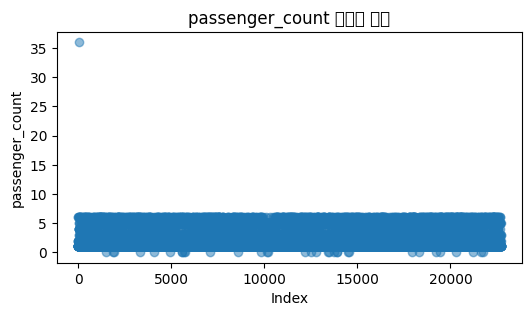

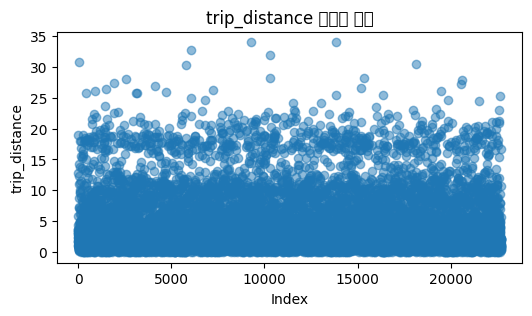

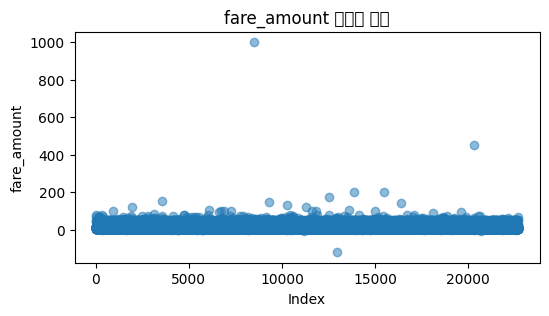

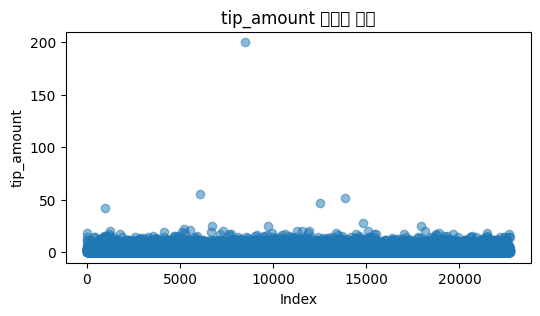

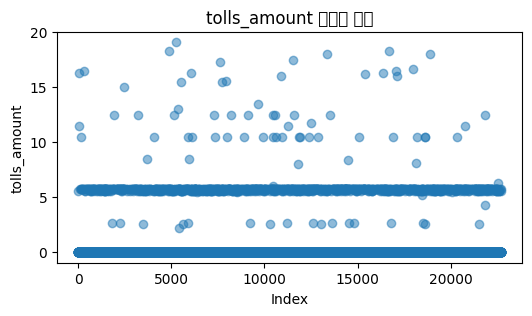

In [15]:
#각 숫자형 변수별로 이상치 확인 (산점도 scatter plot)
import matplotlib.pyplot as plt

# 숫자형 변수별로 산점도 그리기
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    plt.scatter(trip.index, trip[col], alpha=0.5)
    plt.title(f'{col} 이상치 확인')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.show()


In [16]:
# fare_amount가 0보다 작은 값 삭제=> 요금이 0보다 작을 수 없으므로 이상치로 판단
before = len(trip)
trip = trip[trip['fare_amount'] >= 0]
after = len(trip)
print(f"fare_amount < 0 삭제 완료: {before - after}개 제거됨")

fare_amount < 0 삭제 완료: 17개 제거됨


In [17]:
# passenger_account에서 보통 6명이 평균인데 한곳만 35명으로 튀는 이상치 발견, 삭제 필요
# passenger_count에서 10명 이상인 값은 이상치로 판단하여 제거
before = len(trip)
trip = trip[trip['passenger_count'] < 10]
after = len(trip)
print(f"이상치 삭제 완료: {before - after}개 제거됨")


이상치 삭제 완료: 1개 제거됨


In [18]:
#tip_amount에서 이상치 발견, 보통 0~20달러에서 팁을 내나 유독 많이 낸 경우 삭제
# tip_amount가 50달러 초과인 이상치 제거
before = len(trip)
trip = trip[trip['tip_amount'] <= 50]
after = len(trip)
print(f"tip_amount 이상치 제거 완료: {before - after}개 삭제됨")


tip_amount 이상치 제거 완료: 3개 삭제됨


In [19]:
#다시 산점도 확인

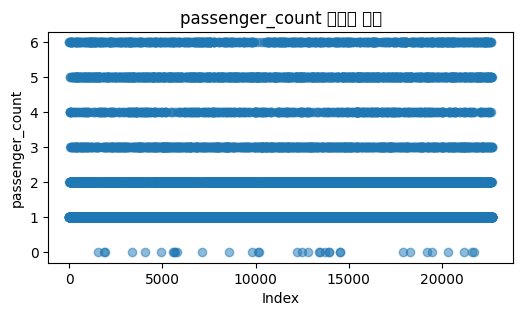

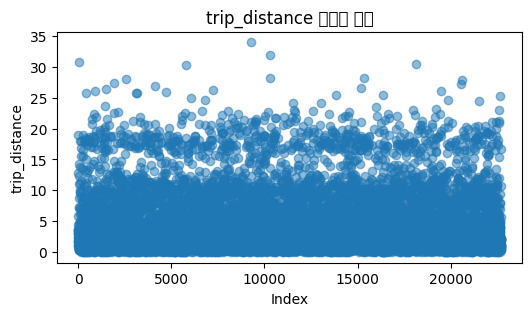

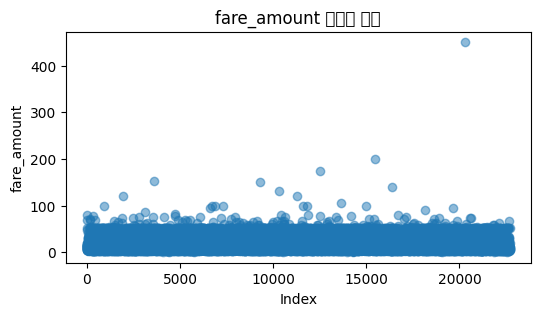

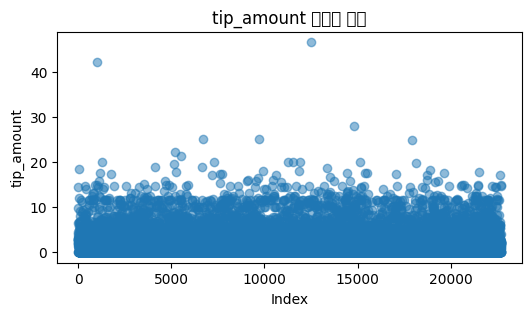

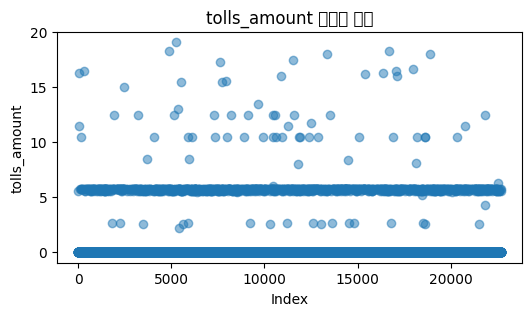

In [20]:
#산점도 scatter plot)
import matplotlib.pyplot as plt

# 숫자형 변수별로 산점도 그리기
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    plt.scatter(trip.index, trip[col], alpha=0.5)
    plt.title(f'{col} 이상치 확인')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.show()
